# 02 k-Nearest Neighbors classifier

## Perform the following tasks

### Using the high-level OverFeat features

- Create a Pipeline with PCA and KNeighborsClassifier steps.
- Split the train set into a (smaller) train and validation sets with respectively 3,200 and 800 points.
- Tune k and distance metric using grid search on those train/validation sets.
- Print the validation accuracy of each combination of parameters.
- Find the combination with the best validation accuracy and print it.
- Fit tuned classifier on the entire train set with 4,000 data points. Evaluate and print the test accuracy.
- Pick a test image and plot it with its 10 nearest neighbors from the train set.

## Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# Load the data form the .npz
with np.load('cifar4-train.npz', allow_pickle=False) as npz_file:
    cifar4 = dict(npz_file.items())
# Overview of the data content    
print('Data keys {}'.format(cifar4.keys()))

Data keys dict_keys(['pixels', 'overfeat', 'labels', 'names', 'allow_pickle'])


In [5]:
# Generate the features matrices with pixels and overfeat
# Create X/y arrays
Xo = cifar4['overfeat']
Xp = cifar4['pixels']
y = cifar4['labels']
names = cifar4['names']

# Explore data verify the dtype of Xo to be float32
inside = npz_file.files
for c in inside:
        print('\n',str(c)+' shape: '+str(cifar4[c].shape),
              '\n',str(c)+' dtype: '+str(cifar4[c].dtype))


 pixels shape: (5000, 3072) 
 pixels dtype: uint8

 overfeat shape: (5000, 4096) 
 overfeat dtype: float32

 labels shape: (5000,) 
 labels dtype: int64

 names shape: (4,) 
 names dtype: <U8

 allow_pickle shape: () 
 allow_pickle dtype: bool


In [6]:
# Partition data set to be able to assess model performance and over/under fitting issues
from sklearn.model_selection import train_test_split

# Split data into train/test sets and insure balanced data sets (stratify)
# Include pixels data set split for last part of exercise
Xo_train, Xo_test, y_train, y_test, Xp_train, Xp_test, label_train, label_test = train_test_split(
    Xo, y, Xp, y, train_size=4000, test_size=1000,
    random_state=0, stratify=y)

# Split data into train/validation sets and insure balanced data sets (stratify)
Xo_tr, Xo_valid, y_tr, y_valid = train_test_split(
    Xo_train, y_train, train_size=3200, test_size=800,
    random_state=0, stratify=y_train)# select y_train for the second Split

## Create a first k-NN classifier

In [52]:
# Create a first k-NN classifier
knn = KNeighborsClassifier(
        algorithm='brute', # Brute-force search
        n_jobs=-1 # As many parallel jobs as possible
    )

# Create a PCA object
# Reducing the number of dimensions before applying k-NN should improve the
# speed and accuracy of your estimator.
# from data exploration stage one knows that with 162 and 387 first components 90-95%
# of variance is explained, then one can take the mean ~275
pca = PCA(n_components=275)

# Create a Pipeline object
pipe = Pipeline([('pca', pca), ('knn', knn)])
pipe.fit(Xo_train, y_train)
# Compute accuracy
accuracy = pipe.score(Xo_test, y_test)
print ('Accuracy first classifier is: {:.3f}'.format(accuracy))

Accuracy first classifier is: 0.761


## Create the best k-NN classifier

In [26]:
# Create the best k-NN classifier based on the small train set and validation set
# This way to proceed allow to define the best parameters/hyperparameters based on validation set

# Redefine the pipeline with a scaler step to be assessed if better with or not
pipe = Pipeline([
    #('scaler', StandardScaler()), # Only a little change. 
    ('pca', pca),
    ('knn', KNeighborsClassifier(
        algorithm='brute', # Brute-force search
        n_jobs=-1 # As many parallel jobs as possible
    ))
])

### Grid search

In [29]:
# Define a set of reasonable values for each parameter
n_compo = np.arange(210, 335,25) # 210, 235, .., 310
k_values = np.arange(6, 60,3) # 6, 9, 12, .., 57
weights_functions = ['uniform', 'distance']
distance_types = [1, 2] # L1, L2 distances

# Define the grid of parameters and values to assess
grid = ParameterGrid({
    'pca__n_components': n_compo,
    'knn__n_neighbors': k_values,
    #'knn__weights': weights_functions, # disabled to match exercise request
    'knn__p': distance_types})

# Print the number of combinations
print('Number of combinations:', len(grid))

Number of combinations: 180


### Fit & tune parameters / hyperparameters

In [30]:
# Save accuracy on test set
valid_scores = []

# Enumerate combinations starting from 1
for i, params_dict in enumerate(grid, 1):
    # Print progress
    print('Combination {}/{}'.format(
        i, len(grid) # Total number of combinations
    ))
    
    # Set parameters
    pipe.set_params(**params_dict)

    # Fit a k-NN classifier
    pipe.fit(Xo_tr, y_tr) # fit on the small train set to tune parameters

    # Save accuracy on validation set
    params_dict['accuracy'] = pipe.score(Xo_valid, y_valid) # assess with validation to tune parameter hyperparameters

    # Save result and corresponding configuration
    valid_scores.append(params_dict)

print('done!')

Combination 1/180
Combination 2/180
Combination 3/180
Combination 4/180
Combination 5/180
Combination 6/180
Combination 7/180
Combination 8/180
Combination 9/180
Combination 10/180
Combination 11/180
Combination 12/180
Combination 13/180
Combination 14/180
Combination 15/180
Combination 16/180
Combination 17/180
Combination 18/180
Combination 19/180
Combination 20/180
Combination 21/180
Combination 22/180
Combination 23/180
Combination 24/180
Combination 25/180
Combination 26/180
Combination 27/180
Combination 28/180
Combination 29/180
Combination 30/180
Combination 31/180
Combination 32/180
Combination 33/180
Combination 34/180
Combination 35/180
Combination 36/180
Combination 37/180
Combination 38/180
Combination 39/180
Combination 40/180
Combination 41/180
Combination 42/180
Combination 43/180
Combination 44/180
Combination 45/180
Combination 46/180
Combination 47/180
Combination 48/180
Combination 49/180
Combination 50/180
Combination 51/180
Combination 52/180
Combination 53/180
Co

### Score dataframe & best results

In [31]:
# Store validation score and hyperparameters configuration in a df
valid_scores = pd.DataFrame(valid_scores)
valid_scores.sort_values(by='accuracy', ascending=False).head(10)
# Plot all the score
#valid_scores.sort_values(by='accuracy', ascending=False).head(len(grid))

,accuracy,knn__n_neighbors,knn__p,pca__n_components
105,0.78000,36,2,210
106,0.77875,36,2,235
99,0.77750,33,2,310
96,0.77750,33,2,235
85,0.77625,30,2,210
135,0.77625,45,2,210
87,0.77625,30,2,260
158,0.77625,51,2,285
125,0.77625,42,2,210
109,0.77625,36,2,310


In [32]:
# Print out the best configuration and score on validation set 
idx = valid_scores['accuracy'].idxmax()
print ('Top accuracy on validation set: {:.3f} with k:{} and distance metric:{}.'
       .format(valid_scores.loc[idx,'accuracy'],
               valid_scores.loc[idx,'knn__n_neighbors'],
               valid_scores.loc[idx,'knn__p']))
print ('Top accuracy on validation set with {} PCA components.'
       .format(valid_scores.loc[idx,'pca__n_components']))

Top accuracy on validation set: 0.780 with k:36 and distance metric:2.
Top accuracy on validation set with 210 PCA components.


In [40]:
# Based on previous analysis compute the Best kNN
k_best = valid_scores.loc[idx,'knn__n_neighbors']
p_best = valid_scores.loc[idx,'knn__p']
n_compo_best = valid_scores.loc[idx,'pca__n_components']
pca_best = PCA(n_compo_best)
Best_kNN = KNeighborsClassifier(p=p_best, n_neighbors=k_best, algorithm='brute', n_jobs=-1)
# Reconfigure Pipeline to best config
pipe = Pipeline([('pca', pca_best),('knn', Best_kNN)])
#pipe = Pipeline([pca,('knn', Best_kNN)])
pipe.fit(Xo_train, y_train) # use the whole train set
# Compute accuracy
best_accuracy = pipe.score(Xo_test, y_test) # assess on test set
print ('Best-kNN accuracy (test set): {:.3f}'.format(best_accuracy))

Best-kNN accuracy (test set): 0.772


All the tuning work did not improve a lot.

## Test image & 10 nearest neighbors

#### Variable exploration

In [42]:
# Select an image and print its shape
print(Xo_test[5].shape)

(4096,)


One has a column vertor of 4096 elements. One wants a image under the row shape, like (1 row,n colums) with n that is different from 0. 

In [43]:
X_img = Xo_test[5].reshape(1, -1)
X_img.shape

(1, 4096)

#### Get the 10 nearest

In [49]:
# Select an image
My_test_image = 429
# Reshape it from a column vector to a row vector
X_img = Xo_test[My_test_image].reshape(1, -1)

# Apply PCA and get the 10 nearest neighbors
neighbors = Best_kNN.kneighbors(pca_best.transform(X_img), 10)
# Get indexes of the 10 nearest
idx = np.ravel(neighbors[1])
# Get distances of the 10 nearest
distance = np.ravel(neighbors[0])
#idx

#### Display results

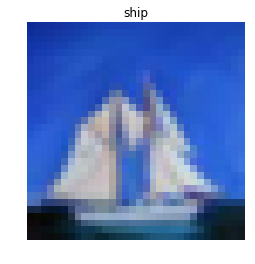

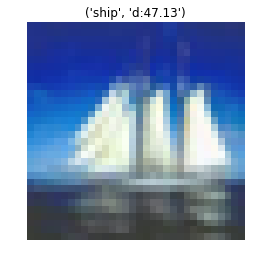

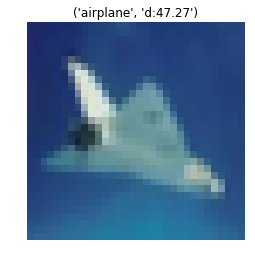

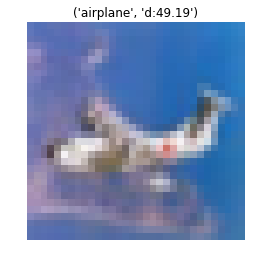

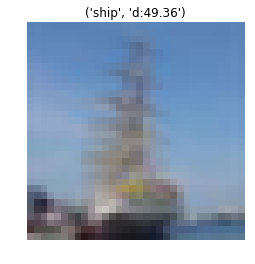

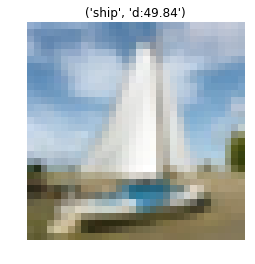

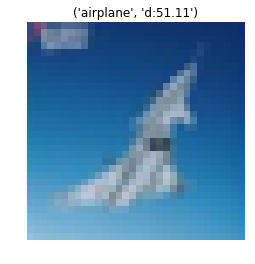

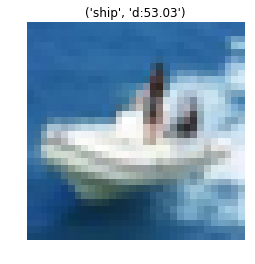

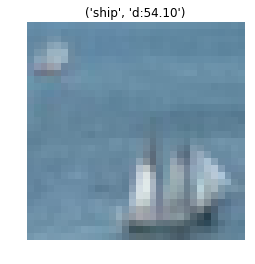

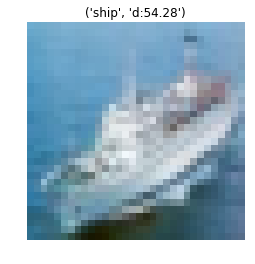

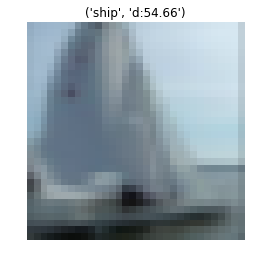

In [50]:
# Display the selected image
flat_img = Xp_test[My_test_image]
img = flat_img.reshape(32, 32, 3)
plt.title(names[label_test[My_test_image]])
plt.axis('off') # Hide the x- and y-axis
plt.imshow(img)
plt.show()
# Display the 10 nearest neighbors from the train set
for i, x in enumerate(idx):
    flat_img = Xp_train[x, :]
    img = flat_img.reshape(32, 32, 3)
    plt.axis('off') # Hide the x- and y-axis
    plt.title(s=(names[label_train[x]],'d:{:.2f}'.format(distance[i])))
    plt.imshow(img)
    plt.show()